In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/shreyakasturia/Downloads/spam.csv", encoding = "latin-1")
df = df[['v1', 'v2']]
df = df.rename(columns = {'v1': 'label', 'v2': 'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

ham     4825
spam     747
Name: label, dtype: int64

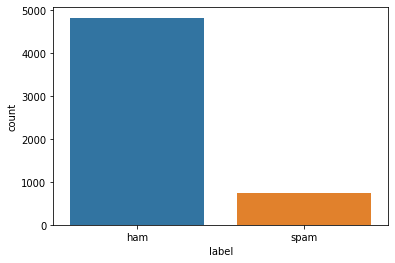

In [5]:
%matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


sns.countplot(x = "label", data = df)
df.loc[:, 'label'].value_counts()



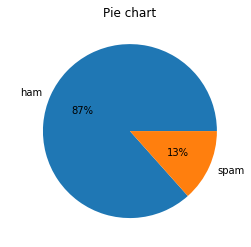

In [6]:
count_Class=pd.value_counts(df["label"], sort= True)
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel(' ')
plt.show()

In [7]:
text_feat = df['text'].copy()

In [8]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [9]:
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
text_feat = text_feat.apply(text_process)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")

In [11]:
features = vectorizer.fit_transform(text_feat)

In [12]:
spam_df = df[df['label'] == 'spam'] 
ham_df = df[df['label'] == 'ham']

In [13]:
stop_words = set(stopwords.words('english'))
def wordCount(text):
    try:
        text = text.lower()
        regex = re.compile('['+re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
        txt = regex.sub(' ',text)  
        words = [w for w in txt.split(' ')\
                if not w in stop_words and len(w)>3]
    except:
        return 0

In [14]:
import re, nltk
def tokenize(text):
    exclude = set(string.punctuation)
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) 
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) 
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [15]:
spam_df['tokens'] = spam_df['text'].map(tokenize)
ham_df['tokens'] = ham_df['text'].map(tokenize)

In [16]:
spam_words = []
for token in spam_df['tokens']:
    spam_words = spam_words + token 
ham_words = []
for token in ham_df['tokens']:
    ham_words += token

In [17]:
from collections import Counter
spam_count = Counter(spam_words).most_common(10)
ham_count = Counter(ham_words).most_common(10)

In [18]:
spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])

spam_count
fig, (ax,ax1) = plt.subplots(1,2,figsize = (18, 6))
sns.barplot(x = spam_count_df['word'], y = spam_count_df['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('word',fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title('spam top 10 words', fontsize = 15)
sns.barplot(x = ham_count_df['word'], y = ham_count_df['count'], ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=15)
ax1.set_title('ham top 10 words', fontsize = 15)

In [19]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
svm = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB(alpha=0.2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [22]:
clfs = {'SVC' : svm, 'NB': mnb, 'LR': lrc, 'RF': rfc}

In [23]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [24]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [25]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [26]:
df1 = pd.DataFrame.from_dict(dict(pred_scores), orient='index', columns=['Score1'])
df1

,Score1
SVC,0.978469
NB,0.984450
LR,0.943182
RF,0.970096


In [27]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [28]:
text_feat = text_feat.apply(stemmer)

In [29]:
features = vectorizer.fit_transform(text_feat)

In [30]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

In [31]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [32]:
df2 = pd.DataFrame.from_dict(dict(pred_scores),orient='index', columns=['Score2'])
df1 = pd.concat([df1,df2],axis=1)
df1

,Score1,Score2
SVC,0.978469,0.978469
NB,0.984450,0.985048
LR,0.943182,0.946770
RF,0.970096,0.974880


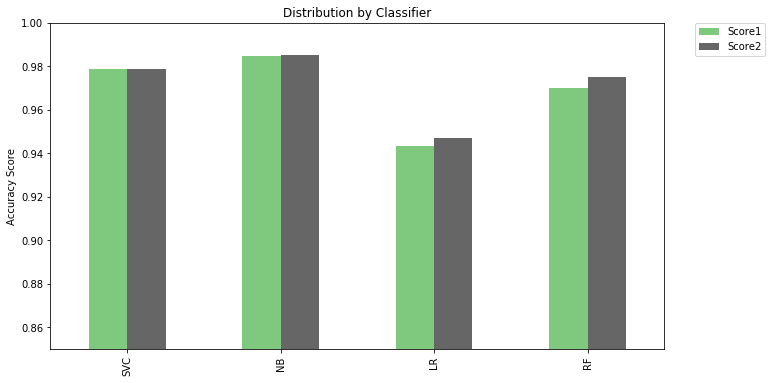

In [33]:
df1.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), df1.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Naive Bayes Spam Filter

In [34]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    text = text.lower()
    text = ''.join([t for t in text if t not in string.punctuation])
    text = [t for t in text.split() if t not in stopwords.words('english')]
    st = Stemmer()
    text = [st.stem(t) for t in text]
    return text

In [35]:
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), 
    ('classifier', MultinomialNB())                    
])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.20, random_state = 21)

In [38]:
spam_filter.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x7f9db97930e0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [39]:
predictions = spam_filter.predict(x_test)

In [40]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 39


In [41]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

In [43]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[975   0]
 [ 39 101]]


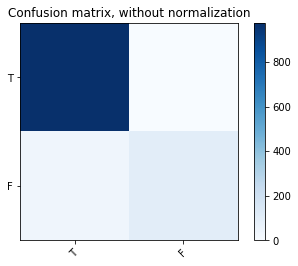

In [44]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['T','F'],
                      title='Confusion matrix, without normalization')

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  975
False Positives:  0
False Negatives:  39
True Positives:  101


In [46]:
import sklearn
sklearn.metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.9650224215246637